### Dima's Exploratory Data Analysis

To start exploring the data I will first start off with importing the necessary libraries I will be needing

In [1]:
# Imports
import pandas as pd
import numpy as np
import sqlite3
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_iris
from pandas import Series, DataFrame

%matplotlib inline

### Movie Info
The dataframe that I will be researching is the movie info dataframe, the first step is that I will read into the tsv file that provided

In [2]:
# Read in the data as movie_info
# Use parse_dates and pass column name to read it as a datetime
movie_info = pd.read_csv('Data/rt.movie_info.tsv', encoding='latin-1', sep='\t', 
                        parse_dates=['theater_date', 'dvd_date'])
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaT,NaN,NaN,200 minutes,NaN


Looking at just the columns within the movie_info dataframe.

In [4]:
movie_info.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [5]:
# Info on the dataframe
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1560 non-null   int64         
 1   synopsis      1498 non-null   object        
 2   rating        1557 non-null   object        
 3   genre         1552 non-null   object        
 4   director      1361 non-null   object        
 5   writer        1111 non-null   object        
 6   theater_date  1201 non-null   datetime64[ns]
 7   dvd_date      1201 non-null   datetime64[ns]
 8   currency      340 non-null    object        
 9   box_office    340 non-null    object        
 10  runtime       1530 non-null   object        
 11  studio        494 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 146.4+ KB


### Data Cleaning

In this section, we will start by cleaning the movie_info dataframe before we can draw any conclusions.
It will help us inspect the data better and get a more accurate general understanding of the data at hand.


**Step 1:** Check if we have any null values in each column

In [6]:
movie_info.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

**Step 2:** Dealing with null values

To clean the columns from null values, I will be replacing the values in some of the columns with 'Missing" so that it's all consistent across the columns

In [37]:
#Fill the missing values in synposis, genre, director, writer, currency, studio with 'Missing'
movie_info['synopsis'].fillna('Missing', inplace=True)
movie_info['rating'].fillna('Missing', inplace=True)
movie_info['genre'].fillna('Missing', inplace=True)
movie_info['director'].fillna('Missing', inplace=True)
movie_info['writer'].fillna('Missing', inplace=True)
movie_info['currency'].fillna('Missing', inplace=True)
movie_info['studio'].fillna('Missing', inplace=True)

In [8]:
#Fill theater_date and dvd_date missing values with a generic date "1800-01-01" to keep same format
movie_info['theater_date'].fillna('1800-01-01', inplace=True)
movie_info['dvd_date'].fillna('1800-01-01', inplace=True)

In [9]:
#Fill box_office missing valus with 0
movie_info['box_office'].fillna(0, inplace=True)

In [39]:
#Fill runtime missing valus with 0
movie_info['runtime'].fillna('0 minutes', inplace=True)

**Step 3:** check for any duplicates

In [10]:
movie_info.duplicated().value_counts()

False    1560
dtype: int64

It doesn't look like we have any duplicates.

In [43]:
movie_info['runtime'] = movie_info['runtime'].str.replace('minutes',"")
movie_info['runtime'] = pd.to_numeric(movie_info['runtime'])

### Data Analyzing

In this section, I want to look at the different variables within this data frame to see what factors may contribute to successful movies

The question I'm looking at is if there is a certain Director that is more successful than others that potentially could be hired to direct the movies?

I will look at the count of movies directed per director, as directors with more experience could potentially yield higher profit due to their expertise. 

- First, I want to sort directors by the amount of movies they've directed.
- Second, I want to look at the trend between the count of movies per director and the profit
    - To do that, I will merge the budget dataframe and movie_info data frame to check the profit generated by each director.
- Third, I will sort the top directors with the highest average profit.

In [11]:
movie_info['director'].value_counts()

Missing                  199
Steven Spielberg          10
Clint Eastwood             8
Ridley Scott               4
Curtis Hanson              4
                        ... 
Anahita Ghazvinizadeh      1
Mamoru Oshii               1
Darnell Martin             1
Lawrence Gough             1
Frank Nissen               1
Name: director, Length: 1126, dtype: int64

In [12]:
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,Missing,0,104 minutes,Missing
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17 00:00:00,2013-01-01 00:00:00,$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13 00:00:00,2000-04-18 00:00:00,Missing,0,116 minutes,Missing
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09 00:00:00,1997-08-27 00:00:00,Missing,0,128 minutes,Missing
4,7,Missing,NR,Drama|Romance,Rodney Bennett,Giles Cooper,1800-01-01,1800-01-01,Missing,0,200 minutes,Missing


In [13]:
# I will create a new dataframe so that I don't alter the original one
director_count = movie_info['director'].value_counts()
director_count

Missing                  199
Steven Spielberg          10
Clint Eastwood             8
Ridley Scott               4
Curtis Hanson              4
                        ... 
Anahita Ghazvinizadeh      1
Mamoru Oshii               1
Darnell Martin             1
Lawrence Gough             1
Frank Nissen               1
Name: director, Length: 1126, dtype: int64

In [15]:
# I want to view the top 25 directors by count of movies directed
director_count.sort_values(ascending=False)[:26]

Missing               199
Steven Spielberg       10
Clint Eastwood          8
Jim Jarmusch            4
Barry Levinson          4
Woody Allen             4
Yimou Zhang             4
William Beaudine        4
Bruce Beresford         4
Alfred Hitchcock        4
Curtis Hanson           4
Ridley Scott            4
William Friedkin        4
Lawrence Kasdan         3
John Frankenheimer      3
Werner Herzog           3
Martha Coolidge         3
Fritz Lang              3
Joseph Ruben            3
Boris Sagal             3
George Cukor            3
Mike Figgis             3
David Lean              3
Howard Hawks            3
David Swift             3
Gerald Thomas           3
Name: director, dtype: int64

In [16]:
# I will make a data frame with just the top 25 directors
top_director = movie_info['director'].value_counts().sort_values(ascending=False).head(26)
top_director

Missing               199
Steven Spielberg       10
Clint Eastwood          8
Jim Jarmusch            4
Barry Levinson          4
Woody Allen             4
Yimou Zhang             4
William Beaudine        4
Bruce Beresford         4
Alfred Hitchcock        4
Curtis Hanson           4
Ridley Scott            4
William Friedkin        4
Lawrence Kasdan         3
John Frankenheimer      3
Werner Herzog           3
Martha Coolidge         3
Fritz Lang              3
Joseph Ruben            3
Boris Sagal             3
George Cukor            3
Mike Figgis             3
David Lean              3
Howard Hawks            3
David Swift             3
Gerald Thomas           3
Name: director, dtype: int64

In [17]:
#Previously I filled all the null values with Missing, I will go ahead and drop the missing row since I have no use for it.
top_director = top_director.drop(labels="Missing")

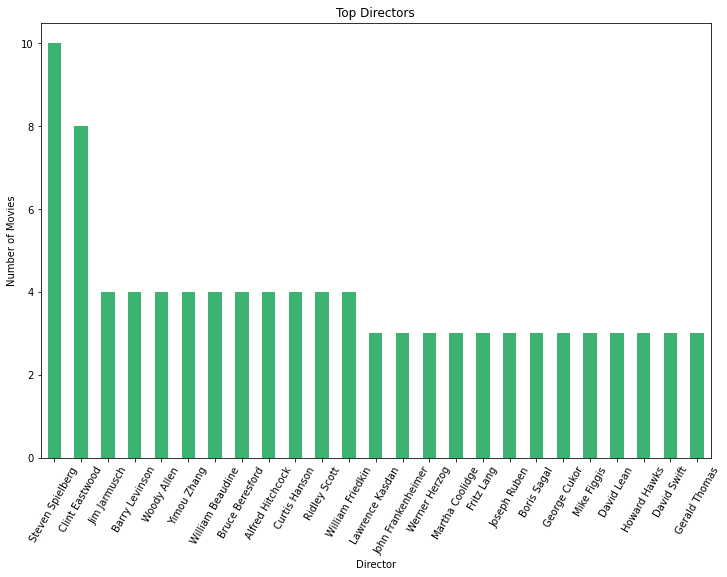

In [29]:
#Let's visualize the top 25 directors
ax = top_director.plot.bar(color='mediumseagreen', figsize=(12,8))
ax.tick_params(axis='x', labelrotation = 60)
ax.set_title('Top Directors')
ax.set_xlabel('Director')
ax.set_ylabel('Number of Movies');        

### Let's look at the budget dataframe

Now that we've looked at top directors. I will look at directors in relation with profit and check if it has a direct relationship with the amount of profit.

For this, I will be using Morgan's work on the budget table since I need the profit, and go from there.

In [30]:
#reading into the csv data file
budgets = pd.read_csv("data/tn.movie_budgets.csv")
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In this table we will assume that **Revenue** = **'worldwide_gross'** & **Cost** = **'production_budget'**

In [31]:
#will follow Morgan's data cleaning for this table
# removing $ and , from gross revenue
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace(",","")
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace("$","")

# casting the values as integers
budgets['worldwide_gross'] = pd.to_numeric(budgets['worldwide_gross'])

In [32]:
# removing $ and , from production budget
budgets['production_budget'] = budgets['production_budget'].str.replace(",","")
budgets['production_budget'] = budgets['production_budget'].str.replace("$","")

# casting the values as integers
budgets['production_budget'] = pd.to_numeric(budgets['production_budget'])

In [33]:
# calculating total profit = revenue - cost
budgets['total_profit'] =  budgets['worldwide_gross'] - budgets['production_budget']

# confirmation
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,999721747


From here on I will continue my work of comparing the total profit from the budgets table to the different factors in the movie_info table

In [59]:
# I don't really need all the columns from this df, tehrefore I will create one with just the columns useful to my analysis
movie_budgets = budgets[['id','movie','worldwide_gross','total_profit']]
movie_budgets

,id,movie,worldwide_gross,total_profit
0,1,Avatar,2776345279,2351345279
1,2,Pirates of the Caribbean: On Stranger Tides,1045663875,635063875
2,3,Dark Phoenix,149762350,-200237650
3,4,Avengers: Age of Ultron,1403013963,1072413963
4,5,Star Wars Ep. VIII: The Last Jedi,1316721747,999721747
...,...,...,...,...
5777,78,Red 11,0,-7000
5778,79,Following,240495,234495
5779,80,Return to the Land of Wonders,1338,-3662
5780,81,A Plague So Pleasant,0,-1400


### Merging movie_info & budget dataframes
Now I want to look to see if there are any trends between the directors and profit

In [60]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1560 non-null   object
 2   rating        1560 non-null   object
 3   genre         1560 non-null   object
 4   director      1560 non-null   object
 5   writer        1560 non-null   object
 6   theater_date  1560 non-null   object
 7   dvd_date      1560 non-null   object
 8   currency      1560 non-null   object
 9   box_office    1560 non-null   object
 10  runtime       1560 non-null   int64 
 11  studio        1560 non-null   object
dtypes: int64(2), object(10)
memory usage: 146.4+ KB


In [61]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               5782 non-null   int64 
 1   movie            5782 non-null   object
 2   worldwide_gross  5782 non-null   int64 
 3   total_profit     5782 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 180.8+ KB


I will join the dataframes using an inner join because it returns only the records with matching keys in both tables, I will make a separate dataframe for the joined dataframes.

In [62]:
movie_info_budget = movie_budgets.join(movie_info, how='inner', lsuffix = '_movie_budgets' , rsuffix = '_movie_info')
movie_info_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 0 to 1559
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_movie_budgets  1560 non-null   int64 
 1   movie             1560 non-null   object
 2   worldwide_gross   1560 non-null   int64 
 3   total_profit      1560 non-null   int64 
 4   id_movie_info     1560 non-null   int64 
 5   synopsis          1560 non-null   object
 6   rating            1560 non-null   object
 7   genre             1560 non-null   object
 8   director          1560 non-null   object
 9   writer            1560 non-null   object
 10  theater_date      1560 non-null   object
 11  dvd_date          1560 non-null   object
 12  currency          1560 non-null   object
 13  box_office        1560 non-null   object
 14  runtime           1560 non-null   int64 
 15  studio            1560 non-null   object
dtypes: int64(5), object(11)
memory usage: 207.2+ KB


In [63]:
#checking the resulting dataframe
movie_info_budget.head()

,id_movie_budgets,movie,worldwide_gross,total_profit,id_movie_info,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,Avatar,2776345279,2351345279,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,Missing,0,104,Missing
1,2,Pirates of the Caribbean: On Stranger Tides,1045663875,635063875,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17 00:00:00,2013-01-01 00:00:00,$,"600,000",108,Entertainment One
2,3,Dark Phoenix,149762350,-200237650,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13 00:00:00,2000-04-18 00:00:00,Missing,0,116,Missing
3,4,Avengers: Age of Ultron,1403013963,1072413963,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09 00:00:00,1997-08-27 00:00:00,Missing,0,128,Missing
4,5,Star Wars Ep. VIII: The Last Jedi,1316721747,999721747,7,Missing,NR,Drama|Romance,Rodney Bennett,Giles Cooper,1800-01-01,1800-01-01,Missing,0,200,Missing


In [64]:
#I want to check how many have 0 for worldwide gross to drop these value, we can see the minimum
movie_info_budget['worldwide_gross'].describe()

count    1.560000e+03
mean     2.374879e+08
std      2.686596e+08
min      0.000000e+00
25%      6.806081e+07
50%      1.523167e+08
75%      3.029080e+08
max      2.776345e+09
Name: worldwide_gross, dtype: float64

In [65]:
#dropped 0 from worldwide in new data frame
movie_info_budget1 = movie_info_budget.loc[movie_info_budget['worldwide_gross'] > 0 ] 

I will look to see if there are trends between the count of movies per director vs. the total profit

In [66]:
#Create top directors df so that we can visualize top directors and top profit
director_counts = pd.DataFrame(movie_info_budget1.groupby('director')['movie'].count())
director_counts

,movie
director,
Abel Ferrara,2
Adam Ravetch|Sarah Robertson,1
Adam Shankman,1
Adam Silver|Ben Hayflick,1
Aditya Chopra,1
...,...
Youssef Delara,1
Yves Simoneau,1
Zak Penn,1


In [67]:
director_total_profit = pd.DataFrame(movie_info_budget1.groupby('director')['total_profit'].sum())
director_total_profit

,total_profit
director,
Abel Ferrara,236643115
Adam Ravetch|Sarah Robertson,72525156
Adam Shankman,225500000
Adam Silver|Ben Hayflick,122981799
Aditya Chopra,546865
...,...
Youssef Delara,-11019637
Yves Simoneau,109558505
Zak Penn,168700000


In [68]:
# I will now join the director counts and total profit together into a new df
top_directors = director_counts.join(director_total_profit, how='outer', lsuffix = '_director_counts' , rsuffix = 'director_total_profit')
top_directors

,movie,total_profit
director,,
Abel Ferrara,2,236643115
Adam Ravetch|Sarah Robertson,1,72525156
Adam Shankman,1,225500000
Adam Silver|Ben Hayflick,1,122981799
Aditya Chopra,1,546865
...,...,...
Youssef Delara,1,-11019637
Yves Simoneau,1,109558505
Zak Penn,1,168700000


In [69]:
top_directors = top_directors.sort_values(by='total_profit', ascending=False)
top_directors

,movie,total_profit
director,,
Missing,194,34814286971
William Friedkin,4,2705957834
Henning Schellerup,1,2008208395
Steven Spielberg,10,1777836004
Jake Kasdan,1,1748134200
...,...,...
Trish Sie,2,-89243731
Robert Hartford-Davis,1,-94635231
Renny Harlin,2,-111069937


In [70]:
#Dropping the missing values
top_directors = top_directors.drop(labels="Missing")

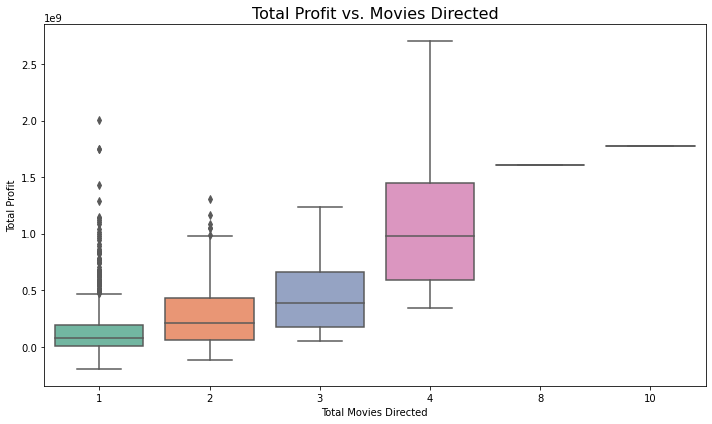

In [71]:
# Plot total profit vs. count of movies directed 
plt.figure(figsize=(10,6))
sns.boxplot(x = top_directors['movie'], y =top_directors['total_profit'], palette=("Set2"))
plt.title('Total Profit vs. Movies Directed', fontsize=16)
plt.xlabel('Total Movies Directed')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

In [73]:
#Now I want to see it in terms of aberage profit instead of total profit
top_directors['avg_profit'] =  top_directors['total_profit']/top_directors['movie']
top_directors['avg_profit'].head()

director
William Friedkin      6.764895e+08
Henning Schellerup    2.008208e+09
Steven Spielberg      1.777836e+08
Jake Kasdan           1.748134e+09
Jay Russell           1.747311e+09
Name: avg_profit, dtype: float64

In [75]:
top_directors['avg_profit'] = top_directors['avg_profit'].sort_values(ascending=False)
top_directors

,movie,total_profit,avg_profit
director,,,
William Friedkin,4,2705957834,6.764895e+08
Henning Schellerup,1,2008208395,2.008208e+09
Steven Spielberg,10,1777836004,1.777836e+08
Jake Kasdan,1,1748134200,1.748134e+09
Jay Russell,1,1747311220,1.747311e+09
...,...,...,...
Trish Sie,2,-89243731,-4.462187e+07
Robert Hartford-Davis,1,-94635231,-9.463523e+07
Renny Harlin,2,-111069937,-5.553497e+07


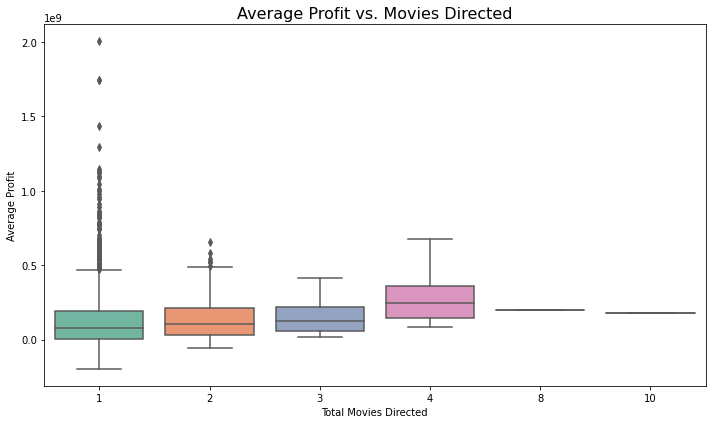

In [76]:
# Plot total profit vs. count of movies directed 
plt.figure(figsize=(10,6))
sns.boxplot(x = top_directors['movie'], y = top_directors['avg_profit'], palette=("Set2"))
plt.title('Average Profit vs. Movies Directed', fontsize=16)
plt.xlabel('Total Movies Directed')
plt.ylabel('Average Profit')
plt.tight_layout()
plt.show()

The trend that both boxplots are showing me is that directors that have directed 3 or more movies have always had an average profit that is positive. We can see that the minimum in the interquartile range is always positive for total movies directed of 3 or more.

Drawing from this trend, going forward I will look at the top 20 directors in terms of average profit that directed 3 or more movies.

In [77]:
#Getting the top 20 directors that directed 3 or more movies
three_plus_movies = top_directors[(top_directors['movie'] >= 3)].head(20)
three_plus_movies

,movie,total_profit,avg_profit
director,,,
William Friedkin,4,2705957834,6.764895e+08
Steven Spielberg,10,1777836004,1.777836e+08
Clint Eastwood,8,1607570579,2.009463e+08
Woody Allen,4,1546517681,3.866294e+08
Yimou Zhang,4,1458132256,3.645331e+08
Barry Levinson,4,1435779099,3.589448e+08
Boris Sagal,3,1237332495,4.124442e+08
Jim Jarmusch,4,1050825592,2.627064e+08
Werner Herzog,3,911024954,3.036750e+08


In [79]:
three_plus_movies = three_plus_movies.reset_index()
three_plus_movies.head()

,index,director,movie,total_profit,avg_profit
0,0,William Friedkin,4,2705957834,6.764895e+08
1,1,Steven Spielberg,10,1777836004,1.777836e+08
2,2,Clint Eastwood,8,1607570579,2.009463e+08
3,3,Woody Allen,4,1546517681,3.866294e+08
4,4,Yimou Zhang,4,1458132256,3.645331e+08


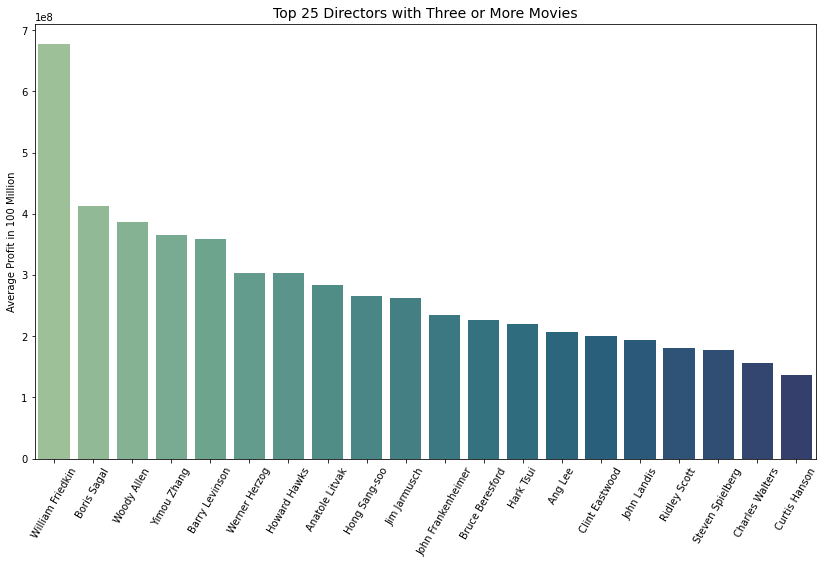

In [83]:
#now let's visualize the results
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x = three_plus_movies['director'], y = three_plus_movies['avg_profit'], order= three_plus_movies.sort_values('avg_profit',ascending = False).director, palette="crest")
plt.xticks(rotation=60)
plt.xlabel(None)
plt.ylabel('Average Profit in 100 Million')
plt.title('Top 25 Directors with Three or More Movies', fontsize=14)
plt.show();

This barplot portrays the top 20 directors in terms of average profit that have directed 3 or more movies. 
The recommendation here is to hire one of those directors as their movies have always resulted profitable.

It is worth mentioning that some of the directors have passed away.
Deceased Directors: Boris Karloff, Howard Hawks, Anatole Litvak, John Frankenheimer, Charles Walters, Curtis Hanson.
